In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
!ls 'gdrive/My Drive/Cell Data/Parasitized'

 C100P61ThinF_IMG_20150918_144104_cell_162.png
 C100P61ThinF_IMG_20150918_144104_cell_163.png
 C100P61ThinF_IMG_20150918_144104_cell_164.png
 C100P61ThinF_IMG_20150918_144104_cell_165.png
 C100P61ThinF_IMG_20150918_144104_cell_166.png
 C100P61ThinF_IMG_20150918_144104_cell_167.png
 C100P61ThinF_IMG_20150918_144104_cell_168.png
 C100P61ThinF_IMG_20150918_144104_cell_169.png
 C100P61ThinF_IMG_20150918_144104_cell_170.png
 C100P61ThinF_IMG_20150918_144104_cell_171.png
 C100P61ThinF_IMG_20150918_144348_cell_138.png
 C100P61ThinF_IMG_20150918_144348_cell_139.png
 C100P61ThinF_IMG_20150918_144348_cell_140.png
 C100P61ThinF_IMG_20150918_144348_cell_141.png
 C100P61ThinF_IMG_20150918_144348_cell_142.png
 C100P61ThinF_IMG_20150918_144348_cell_143.png
 C100P61ThinF_IMG_20150918_144348_cell_144.png
 C100P61ThinF_IMG_20150918_144823_cell_157.png
 C100P61ThinF_IMG_20150918_144823_cell_158.png
 C100P61ThinF_IMG_20150918_144823_cell_159.png
 C100P61ThinF_IMG_20150918_144823_cell_160.png
 C100P61ThinF

In [ ]:
from fastai.vision import *
from fastai.metrics import *

In [ ]:
!ls 'gdrive/My Drive/Cell Data/Uninfected'

 C100P61ThinF_IMG_20150918_144104_cell_128.png
 C100P61ThinF_IMG_20150918_144104_cell_131.png
 C100P61ThinF_IMG_20150918_144104_cell_144.png
 C100P61ThinF_IMG_20150918_144104_cell_21.png
 C100P61ThinF_IMG_20150918_144104_cell_25.png
 C100P61ThinF_IMG_20150918_144104_cell_34.png
 C100P61ThinF_IMG_20150918_144104_cell_48.png
 C100P61ThinF_IMG_20150918_144104_cell_65.png
 C100P61ThinF_IMG_20150918_144348_cell_108.png
 C100P61ThinF_IMG_20150918_144348_cell_120.png
 C100P61ThinF_IMG_20150918_144348_cell_125.png
 C100P61ThinF_IMG_20150918_144348_cell_131.png
 C100P61ThinF_IMG_20150918_144348_cell_25.png
 C100P61ThinF_IMG_20150918_144348_cell_2.png
 C100P61ThinF_IMG_20150918_144348_cell_40.png
 C100P61ThinF_IMG_20150918_144348_cell_71.png
 C100P61ThinF_IMG_20150918_144823_cell_126.png
 C100P61ThinF_IMG_20150918_144823_cell_127.png
 C100P61ThinF_IMG_20150918_144823_cell_139.png
 C100P61ThinF_IMG_20150918_144823_cell_142.png
 C100P61ThinF_IMG_20150918_144823_cell_151.png
 C100P61ThinF_IMG_20150

In [ ]:
bs = 32
#batch size - the number of images we show in each epoch before updating the weights

In this next step, we are declaring our classes.

In [ ]:
classes = ['Uninfected', 'Parasitized']

path = Path('gdrive/My Drive/Cell Data/')
path

PosixPath('gdrive/My Drive/Cell Data')

FastAI can't work with image files directly so it creates a DataBunch object from the images provided. That object is later used in the learner. valid_pct=0.2 means that we are keeping 20% of the data for validation.

We can now visualize our dataset by batch using show_batch method.

In [ ]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

data

ImageDataBunch;

Train: LabelList (21496 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Uninfected,Uninfected,Uninfected,Uninfected,Uninfected
Path: gdrive/My Drive/Cell Data;

Valid: LabelList (5373 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Uninfected,Uninfected,Parasitized,Uninfected,Uninfected
Path: gdrive/My Drive/Cell Data;

Test: None

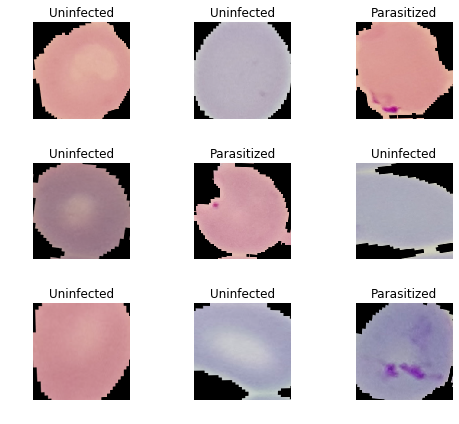

In [ ]:
data.show_batch(rows=3, figsize=(7,6))

In [ ]:
print(data.classes)
len(data.classes)

['Parasitized', 'Uninfected']


2

The create_cnn method is helping to automatically get a pre-trained model from the given architecture. Here we are using resnet34 architecture, which is a very popular model for Vision learning.



In [ ]:
learn = cnn_learner(data, models.resnet34, metrics=[accuracy, error_rate], model_dir="/temp/model/")
learn

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:03<00:00, 28730201.33it/s]


Learner(data=ImageDataBunch;

Train: LabelList (21496 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Uninfected,Uninfected,Uninfected,Uninfected,Uninfected
Path: gdrive/My Drive/Cell Data;

Valid: LabelList (5373 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Uninfected,Uninfected,Parasitized,Uninfected,Uninfected
Path: gdrive/My Drive/Cell Data;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  

In [ ]:
learn.lr_find()


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


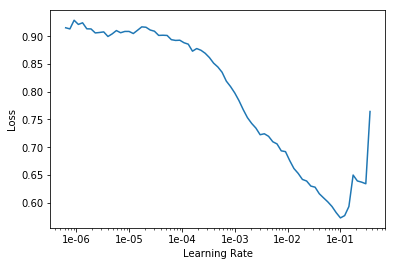

In [ ]:
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(5, slice(1e-03, 1e-02))


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.190709,0.135658,0.949004,0.050996,49:55
1,0.160691,0.115148,0.958124,0.041876,03:31
2,0.136018,0.097044,0.962963,0.037037,03:31
3,0.110528,0.091141,0.964638,0.035362,03:30
4,0.111045,0.088603,0.965196,0.034804,03:31


In [ ]:
learn.save('stage-1')

In [ ]:
learn.load('stage-1')

In [ ]:
learn.unfreeze()

In [ ]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


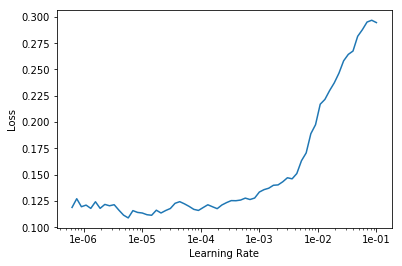

In [ ]:
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.105384,0.087570,0.965382,0.034618,03:31
1,0.108565,0.087336,0.965382,0.034618,03:31


In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

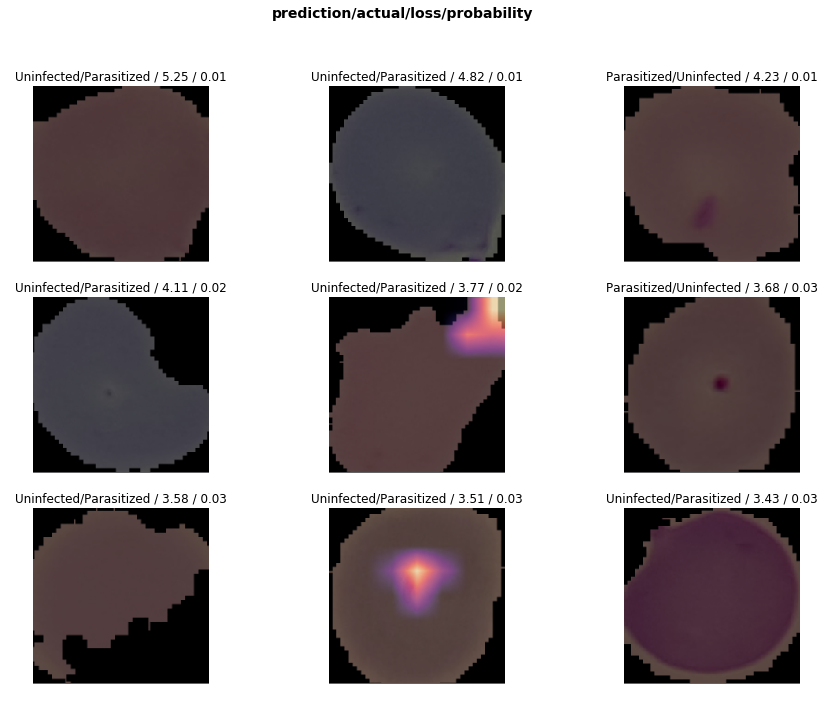

In [ ]:
interp.plot_top_losses(9, figsize=(15,11))

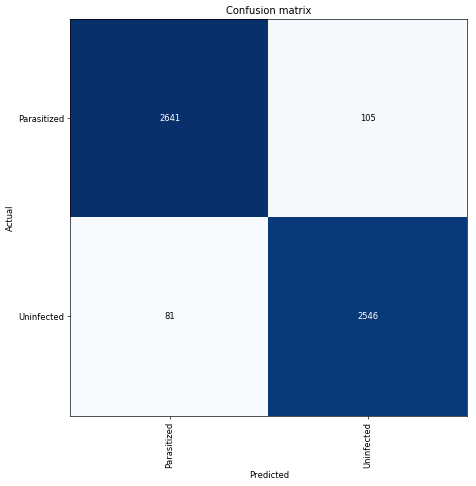

In [ ]:
interp.plot_confusion_matrix(figsize=(8,8), dpi=60)

# We will now use ResNet using 50 layers this time

In [ ]:
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)


In [ ]:
learn = cnn_learner(data, models.resnet50, metrics=[accuracy, error_rate], model_dir="/temp/model/")
learn

Learner(data=ImageDataBunch;

Train: LabelList (21496 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Uninfected,Uninfected,Uninfected,Uninfected,Uninfected
Path: gdrive/My Drive/Cell Data;

Valid: LabelList (5373 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Parasitized,Parasitized,Uninfected,Parasitized,Parasitized
Path: gdrive/My Drive/Cell Data;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): 

In [ ]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


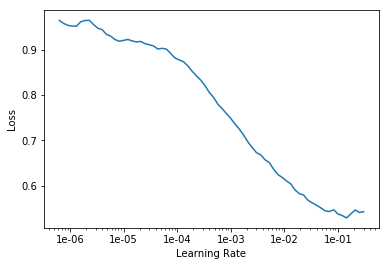

In [ ]:
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(5, slice(1e-03, 1e-02))

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.095563,0.097347,0.967802,0.032198,03:48
1,0.096326,0.091387,0.968919,0.031081,03:47
2,0.096968,0.088226,0.966685,0.033315,03:47
3,0.087237,0.079994,0.970594,0.029406,03:46
4,0.071993,0.076988,0.971524,0.028476,03:46


In [ ]:
learn.save('stage-1-50')

In [ ]:
learn.load('stage-1-50')

Learner(data=ImageDataBunch;

Train: LabelList (21496 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Uninfected,Uninfected,Uninfected,Uninfected,Uninfected
Path: gdrive/My Drive/Cell Data;

Valid: LabelList (5373 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Parasitized,Parasitized,Uninfected,Parasitized,Parasitized
Path: gdrive/My Drive/Cell Data;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): 

In [ ]:
learn.unfreeze()

In [ ]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


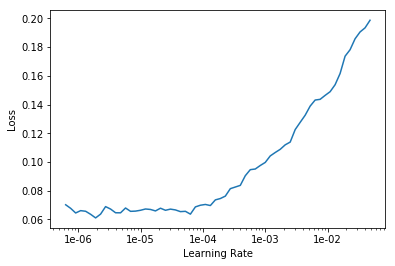

In [ ]:
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.070615,0.076787,0.973572,0.026428,04:03
1,0.074001,0.075875,0.973013,0.026987,04:10


In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

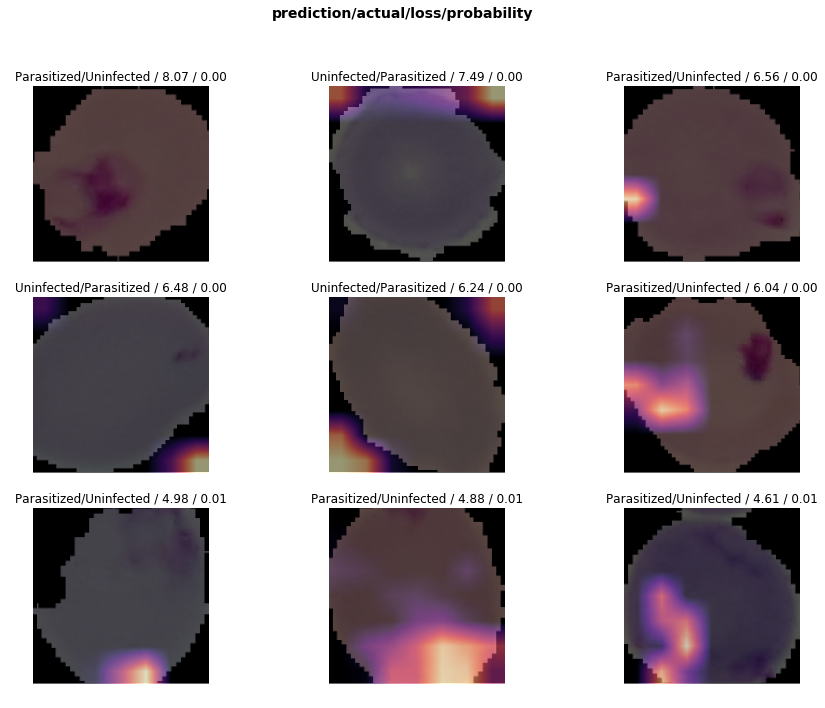

In [ ]:
interp.plot_top_losses(9, figsize=(15,11))

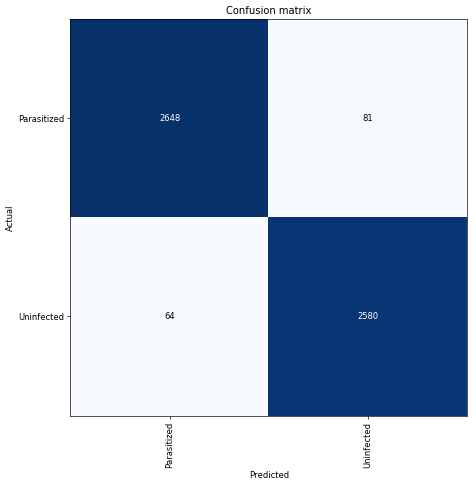

In [ ]:
interp.plot_confusion_matrix(figsize=(8,8), dpi=60)

# We will now use the ResNet model using 101 layers.

In [ ]:
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [ ]:
learn = cnn_learner(data, models.resnet101, metrics=[accuracy, error_rate], model_dir="/temp/model/")
learn

Downloading: "https://download.pytorch.org/models/resnet101-5d3b4d8f.pth" to /root/.cache/torch/checkpoints/resnet101-5d3b4d8f.pth
100%|██████████| 178728960/178728960 [00:03<00:00, 51621140.21it/s]


Learner(data=ImageDataBunch;

Train: LabelList (21496 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Uninfected,Uninfected,Uninfected,Uninfected,Uninfected
Path: gdrive/My Drive/Cell Data;

Valid: LabelList (5373 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Uninfected,Uninfected,Parasitized,Uninfected,Uninfected
Path: gdrive/My Drive/Cell Data;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): Bat

In [ ]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


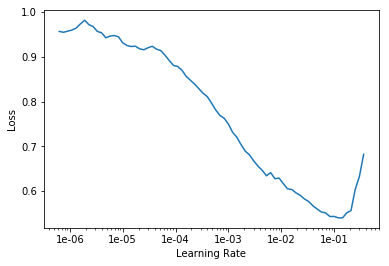

In [ ]:
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(5, slice(1e-04, 1e-03))

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.088155,0.086368,0.967802,0.032198,04:51
1,0.099458,0.082758,0.968546,0.031454,05:04
2,0.096493,0.081189,0.969849,0.030151,05:04
3,0.077698,0.079503,0.970221,0.029779,05:04
4,0.070537,0.077705,0.970780,0.029220,05:04


In [ ]:
learn.save('stage-101')

In [ ]:
learn.load('stage-101')

Learner(data=ImageDataBunch;

Train: LabelList (21496 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Uninfected,Uninfected,Uninfected,Uninfected,Uninfected
Path: gdrive/My Drive/Cell Data;

Valid: LabelList (5373 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Uninfected,Uninfected,Parasitized,Uninfected,Uninfected
Path: gdrive/My Drive/Cell Data;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): Bat

In [ ]:
learn.unfreeze()

In [ ]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


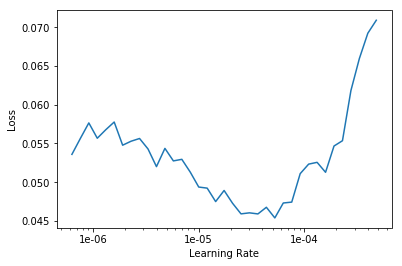

In [ ]:
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-5))

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.050574,0.070431,0.973385,0.026615,06:48
1,0.044684,0.070266,0.975060,0.024940,06:49


In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

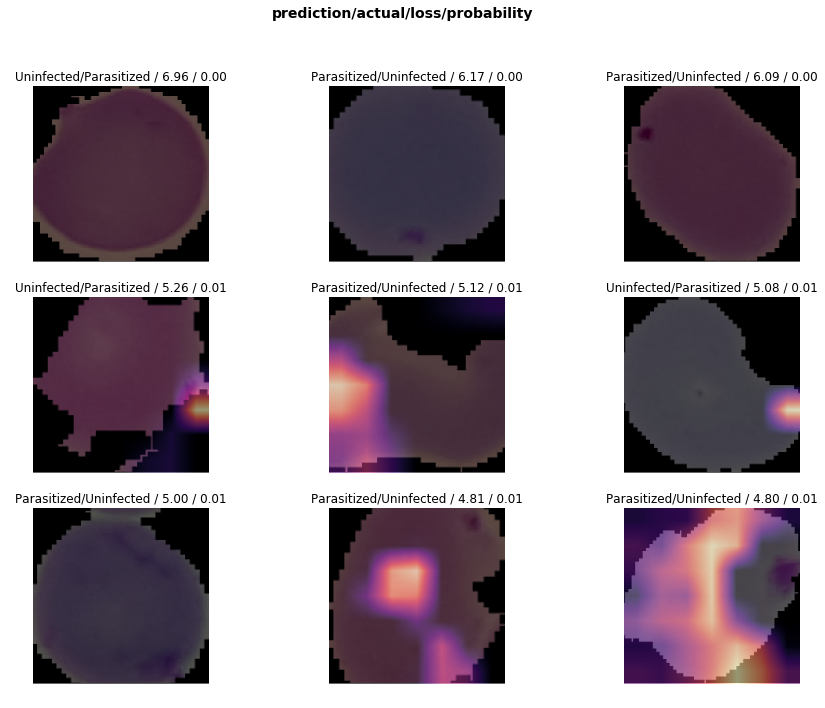

In [ ]:
interp.plot_top_losses(9, figsize=(15,11))

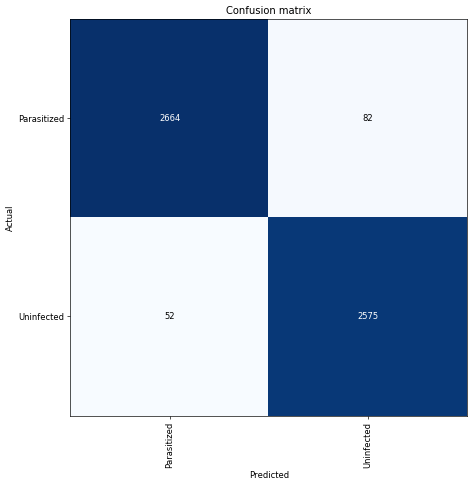

In [ ]:
interp.plot_confusion_matrix(figsize=(8,8), dpi=60)

According to the confusion matrix, the overall accuracy score of the classifier correctly diagnosing parasitized/uninfected cells is around 97.3% with an error rate of about 2.7%.
The percent of correctly diagnosing parasitized/infected cells is around 96.8% with the risk of running a Type 1 error of incorrectly diagnosing an uninfected cell as parasitized is around 3.2%, or 87 times out of the 2746 predictions. The percent of correctly diagnosing an uninfected cell is around 97.8% with the risk of running a Type II error of incorrectly diagnosing an uninfected cell as parasitized is around 2.2%, or 58 times out of the 2627 predictions. In terms of precision - the model correctly predicting the cells as parasitized is around 97.9%. The prevalence of a parasitized condition actually occurring in the sample is around 51.1%.


In [ ]:
interp.most_confused(min_val=2)

[('Parasitized', 'Uninfected', 82), ('Uninfected', 'Parasitized', 52)]